In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import missingno as mn
import time
from datetime import date

In [2]:
train_2016=pd.read_csv('/Users/claire-lwz/Desktop/semester 3/686/Kaggle competition/train_2016_v2.csv')
train_2016.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [3]:
#check missing value
logerror=pd.DataFrame(train_2016['logerror'])
logerror.isnull().any()

logerror    False
dtype: bool

In [4]:
# statistical overview of target variable
logerror.describe()

,logerror
count,90275.000000
mean,0.011457
std,0.161079
min,-4.605000
25%,-0.025300
50%,0.006000
75%,0.039200
max,4.737000


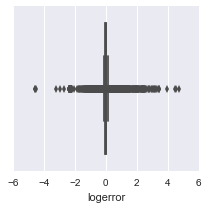

In [5]:
#box plot
box=sns.FacetGrid(logerror)
box.map(sns.boxplot,'logerror')

Outliers exist in two tails.

In [6]:
#using IQR method deal with outliers
q1,q2,q3 = np.percentile(logerror,(25,50,75))
IQR=q3-q1
low=q1-1.5*IQR
high=q3+1.5*IQR
print('If logerror value beyonds '+str(low)+' to '+str(high)+', it is an outlier.')

If logerror value beyonds -0.12205 to 0.13595, it is an outlier.


In [7]:
logerror=list(train_2016['logerror'])

In [8]:
#remove outliers
logerror=[x for x in logerror if low<x<high]
logerror

[0.0276,
 -0.0040000000000000001,
 0.0218,
 -0.0050000000000000001,
 0.044000000000000004,
 -0.0030000000000000001,
 0.0843,
 -0.0161,
 0.0344,
 0.081600000000000006,
 -0.044999999999999998,
 0.002,
 0.044000000000000004,
 -0.0419,
 -0.002,
 0.01,
 -0.038699999999999998,
 0.0218,
 0.0149,
 0.11509999999999999,
 -0.044000000000000004,
 -0.074700000000000003,
 0.0080000000000000002,
 0.001,
 -0.053400000000000003,
 -0.039800000000000002,
 -0.029399999999999999,
 0.020799999999999999,
 -0.023300000000000001,
 0.026599999999999999,
 -0.022200000000000001,
 -0.027400000000000001,
 -0.001,
 0.052600000000000001,
 -0.048099999999999997,
 0.041099999999999998,
 0.023699999999999999,
 -0.0060000000000000001,
 0.041099999999999998,
 -0.090999999999999998,
 0.044999999999999998,
 0.0402,
 0.044999999999999998,
 -0.036700000000000003,
 -0.040800000000000003,
 0.015900000000000001,
 0.0060000000000000001,
 -0.017100000000000001,
 0.0344,
 0.063899999999999998,
 0.063899999999999998,
 0.057299999999

In [9]:
logerror=pd.DataFrame(logerror)
logerror.describe()

,0
count,79697.000000
mean,0.005587
std,0.046684
min,-0.121000
25%,-0.021200
50%,0.005000
75%,0.032500
max,0.135400


In [10]:
logerror.isnull().any()

0    False
dtype: bool

/Users/claire-lwz/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


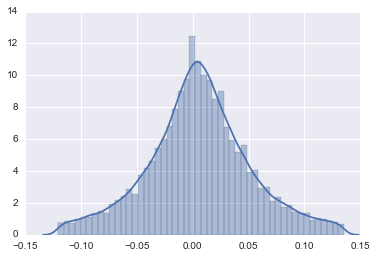

In [11]:
#histogram
sns.distplot(logerror,hist=True)

It looks like that Logerror follows normal distribution.

In [12]:
#parcelid
parcelid=train_2016['parcelid']
parcelid=parcelid.value_counts().reset_index()
parcelid.head()

,index,parcelid
0,11842707,3
1,12613442,2
2,12032773,2
3,11729067,2
4,11845988,2


In [13]:
parcelid['parcelid'].value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64

This result shows that only one paicel id was used for 3 times, the majority ids were used for only once.

In [14]:
#transaction date
transaction_date=pd.to_datetime(train_2016['transactiondate'])
month=transaction_date.dt.month
month.head()

0    1
1    1
2    1
3    1
4    1
Name: transactiondate, dtype: int64

In [15]:
month_freq=month.value_counts()
month_freq

6     10922
8     10476
5      9961
7      9947
9      9575
4      9311
3      8652
1      6556
2      6333
10     4977
11     1826
12     1739
Name: transactiondate, dtype: int64

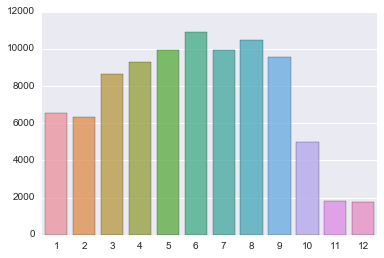

In [16]:
sns.barplot(month_freq.index, month_freq.values, alpha=0.8)

1. According to the data description, we have  all the transactions before October 15, 2016, plus some of the transactions after October 15, 2016, which make sense that the transaction numbers are kind of low from October to December. 
2. Ans from this figure, transaction numbers increased from start of this year and reached the highest in June, then kept in a stable transaction amount.
3. Because we don't have all transaction data from October, so we can't get the transaction trend adter September.

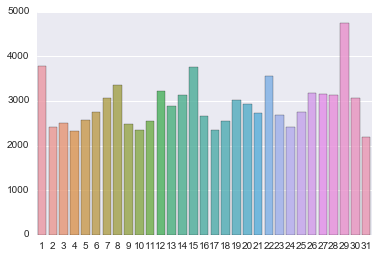

In [17]:
day=transaction_date.dt.day
day_freq=day.value_counts()
sns.barplot(day_freq.index,day_freq.values,alpha=0.8)

Seen from this figure, day is not a significant factor that affects transaction amount.

In [18]:
properties_2016=pd.read_csv('/Users/claire-lwz/Desktop/semester 3/686/Kaggle competition/properties_2016.csv')
properties_2016.head()

/Users/claire-lwz/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [19]:
properties_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
parcelid                        int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottub

In [20]:
#check missing value
properties_2016.isnull().any()

parcelid                        False
airconditioningtypeid            True
architecturalstyletypeid         True
basementsqft                     True
bathroomcnt                      True
bedroomcnt                       True
buildingclasstypeid              True
buildingqualitytypeid            True
calculatedbathnbr                True
decktypeid                       True
finishedfloor1squarefeet         True
calculatedfinishedsquarefeet     True
finishedsquarefeet12             True
finishedsquarefeet13             True
finishedsquarefeet15             True
finishedsquarefeet50             True
finishedsquarefeet6              True
fips                             True
fireplacecnt                     True
fullbathcnt                      True
garagecarcnt                     True
garagetotalsqft                  True
hashottuborspa                   True
heatingorsystemtypeid            True
latitude                         True
longitude                        True
lotsizesquar

In [21]:
properties_16=(properties_2016.isnull().sum()).reset_index()
properties_16.columns=('features','missing_freq')
properties_16

,features,missing_freq
0,parcelid,0
1,airconditioningtypeid,2173698
2,architecturalstyletypeid,2979156
3,basementsqft,2983589
4,bathroomcnt,11462
5,bedroomcnt,11450
6,buildingclasstypeid,2972588
7,buildingqualitytypeid,1046729
8,calculatedbathnbr,128912
9,decktypeid,2968121


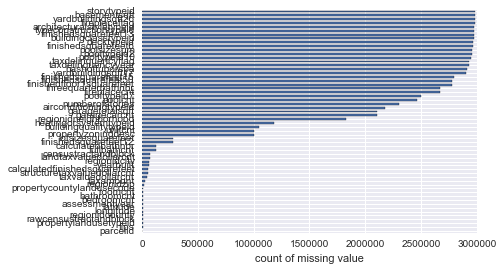

In [22]:
(properties_2016.isnull().sum()).sort_values(ascending=True).plot(kind='barh')
plt.xlabel('count of missing value')
plt.show()

In [77]:
#merge train data and 2016 properties data
train=pd.merge(train_2016,properties_2016,on='parcelid',how='left')
train_x=train.drop(['parcelid','logerror'],axis=1,inplace=False)
train.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [78]:
train_tp=train_x.dtypes.reset_index()
train_tp.columns = ["feature","type"]
train_tp

,feature,type
0,transactiondate,object
1,airconditioningtypeid,float64
2,architecturalstyletypeid,float64
3,basementsqft,float64
4,bathroomcnt,float64
5,bedroomcnt,float64
6,buildingclasstypeid,float64
7,buildingqualitytypeid,float64
8,calculatedbathnbr,float64
9,decktypeid,float64


In [79]:
train_tp['type'].value_counts()

float64    52
object      6
Name: type, dtype: int64

After we remove target(logerror) and parcelid, most od the variables are float, only 6 of them are object, meaning categorical.

In [80]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 58 columns):
transactiondate                 90275 non-null object
airconditioningtypeid           28781 non-null float64
architecturalstyletypeid        261 non-null float64
basementsqft                    43 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingclasstypeid             16 non-null float64
buildingqualitytypeid           57364 non-null float64
calculatedbathnbr               89093 non-null float64
decktypeid                      658 non-null float64
finishedfloor1squarefeet        6856 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
finishedsquarefeet12            85596 non-null float64
finishedsquarefeet13            33 non-null float64
finishedsquarefeet15            3564 non-null float64
finishedsquarefeet50            6856 non-null float64
finishedsquarefeet6         

In [81]:
train_x.isnull().sum().sort_values(ascending=False)

buildingclasstypeid             90259
finishedsquarefeet13            90242
storytypeid                     90232
basementsqft                    90232
yardbuildingsqft26              90180
fireplaceflag                   90053
architecturalstyletypeid        90014
typeconstructiontypeid          89976
finishedsquarefeet6             89854
decktypeid                      89617
poolsizesum                     89306
pooltypeid10                    89114
pooltypeid2                     89071
taxdelinquencyyear              88492
taxdelinquencyflag              88492
hashottuborspa                  87910
yardbuildingsqft17              87629
finishedsquarefeet15            86711
finishedsquarefeet50            83419
finishedfloor1squarefeet        83419
fireplacecnt                    80668
threequarterbathnbr             78266
pooltypeid7                     73578
poolcnt                         72374
numberofstories                 69705
airconditioningtypeid           61494
garagetotals

For total 90725 rows, some of the features have over 90000 missing value, so we may consider remove these variables.

In [82]:
percentage=train_x['finishedsquarefeet6'].isnull().sum()/90725*100

In [83]:
print('The features: buildingclasstypeid, finishedsquarefeet13, storytypeid,basementsqft, yardbuildingsqft26, fireplaceflag, architecturalstyletypeid, typeconstructiontypeid, finishedsquarefeet6 counts more than '+ str(percentage)+ 'percent minsing values.')

The features: buildingclasstypeid, finishedsquarefeet13, storytypeid,basementsqft, yardbuildingsqft26, fireplaceflag, architecturalstyletypeid, typeconstructiontypeid, finishedsquarefeet6 counts more than 99.0399559107percent minsing values.


1. Because the features: fips, assessmentyear, bathroomcnt, bedroomcnt, roomcnt, latitude, regionidcounty, rawcensustractandblock, propertylandusetypeid, longitude, transactiondate, have no missing value, so we'll conduct further steps to check their relationships with target: logerror.
2. As mentioned before, the features have over 99% missing value, we consider removing them.

In [84]:
train_x2=train_x.drop(['buildingclasstypeid','finishedsquarefeet13','storytypeid','basementsqft','yardbuildingsqft26', 'fireplaceflag', 'architecturalstyletypeid', 'typeconstructiontypeid', 'finishedsquarefeet6'],axis=1,inplace=False)
train_x2.head()

,transactiondate,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,...,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,2016-01-01,1.0,2.0,3.0,4.0,2.0,NaN,NaN,1684.0,1684.0,...,1959.0,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,2016-01-01,NaN,3.5,4.0,NaN,3.5,NaN,NaN,2263.0,2263.0,...,2014.0,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,2016-01-01,1.0,3.0,2.0,4.0,3.0,NaN,NaN,2217.0,2217.0,...,1940.0,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,2016-01-02,1.0,2.0,2.0,4.0,2.0,NaN,NaN,839.0,839.0,...,1987.0,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,2016-01-02,NaN,2.5,4.0,NaN,2.5,NaN,NaN,2283.0,2283.0,...,1981.0,2.0,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [85]:
#a new dataframe with all features have no NULL and the target
train_nonull=train[['logerror','fips','bathroomcnt','bedroomcnt','roomcnt','latitude','regionidcounty','rawcensustractandblock','propertylandusetypeid','longitude','transactiondate']]
train_nonull.head()

,logerror,fips,bathroomcnt,bedroomcnt,roomcnt,latitude,regionidcounty,rawcensustractandblock,propertylandusetypeid,longitude,transactiondate
0,0.0276,6037.0,2.0,3.0,0.0,34280990.0,3101.0,6.037107e+07,261.0,-118488536.0,2016-01-01
1,-0.1684,6059.0,3.5,4.0,0.0,33668120.0,1286.0,6.059052e+07,261.0,-117677556.0,2016-01-01
2,-0.0040,6037.0,3.0,2.0,0.0,34136312.0,3101.0,6.037464e+07,261.0,-118175032.0,2016-01-01
3,0.0218,6037.0,2.0,2.0,0.0,33755800.0,3101.0,6.037296e+07,266.0,-118309000.0,2016-01-02
4,-0.0050,6059.0,2.5,4.0,8.0,33485643.0,1286.0,6.059042e+07,261.0,-117700234.0,2016-01-02


In [86]:
corr=train_nonull.corr()

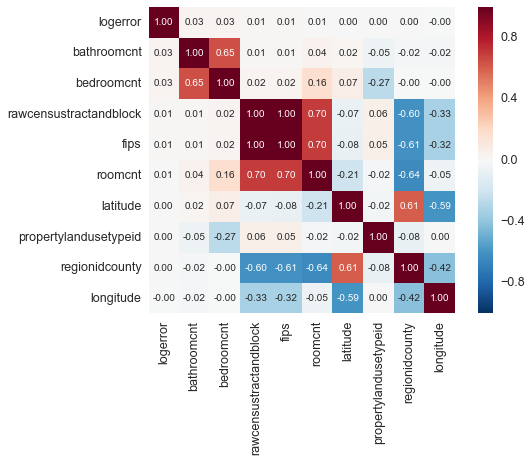

In [87]:
k = 10 #number of variables for heatmap
cols1 = corr.nlargest(k,'logerror')['logerror'].index
cor = np.corrcoef(train_nonull[cols1].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cor, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols1.values, xticklabels=cols1.values)
plt.figure(figsize=(12,9))
plt.show()

Only bathroomcnt, debroomcnt, rawcensustractandblock, fips, rommcnt have relationships with lhousing price.

In [88]:
# for features which are almost complete, we use mean to replace NULL.
train_withmean=train[['logerror','finishedsquarefeet12','regionidcity','calculatedbathnbr','fullbathcnt','yearbuilt','calculatedfinishedsquarefeet','censustractandblock','structuretaxvaluedollarcnt','regionidzip','taxamount','taxvaluedollarcnt','propertycountylandusecode','landtaxvaluedollarcnt']]
train_withmean.mean()

logerror                        1.145722e-02
finishedsquarefeet12            1.745455e+03
regionidcity                    3.376133e+04
calculatedbathnbr               2.309216e+00
fullbathcnt                     2.241231e+00
yearbuilt                       1.968533e+03
calculatedfinishedsquarefeet    1.773186e+03
censustractandblock             6.049151e+13
structuretaxvaluedollarcnt      1.800934e+05
regionidzip                     9.658613e+04
taxamount                       5.983976e+03
taxvaluedollarcnt               4.576726e+05
landtaxvaluedollarcnt           2.783353e+05
dtype: float64

In [89]:
train_withmean=train_withmean.fillna(train_withmean.mean())

In [103]:
#fireplaceflag, pooltypeid10, pooltypeid2, taxdelinquencyflag, hashottuborspa, pooltypeid7, poolcnt
train_new=train.fillna(train_new.mean())
cols=[col for col in train_new.columns if train_new[col].dtype=='float64' if col not in ['logerror']]
train_new=train_new[cols]

#train_new=train_new.drop(['logerror'],axis=1,inplace=False)
train_new.head()

,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
0,1.000000,7.229885,713.581395,2.0,3.0,4.0,4.000000,2.0,66.0,1347.974037,...,311.694737,1959.0,1.440739,122754.0,360170.0,2015.0,237416.0,6735.88,13.402692,6.037107e+13
1,1.816372,7.229885,713.581395,3.5,4.0,4.0,5.565407,3.5,66.0,1347.974037,...,311.694737,2014.0,1.440739,346458.0,585529.0,2015.0,239071.0,10153.02,13.402692,6.049151e+13
2,1.000000,7.229885,713.581395,3.0,2.0,4.0,4.000000,3.0,66.0,1347.974037,...,311.694737,1940.0,1.440739,61994.0,119906.0,2015.0,57912.0,11484.48,13.402692,6.037464e+13
3,1.000000,7.229885,713.581395,2.0,2.0,4.0,4.000000,2.0,66.0,1347.974037,...,311.694737,1987.0,1.440739,171518.0,244880.0,2015.0,73362.0,3048.74,13.402692,6.037296e+13
4,1.816372,7.229885,713.581395,2.5,4.0,4.0,5.565407,2.5,66.0,1347.974037,...,311.694737,1981.0,2.000000,169574.0,434551.0,2015.0,264977.0,5488.96,13.402692,6.059042e+13


In [104]:
labels = []
values = []
for col in cols:
    labels.append(col)
    values.append(np.corrcoef(train_new[col].values, train.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df=corr_df.sort_values(by='corr_values')
corr_df

,col_labels,corr_values
21,heatingorsystemtypeid,-0.019648
6,buildingqualitytypeid,-0.007880
49,taxamount,-0.006671
35,regionidzip,-0.006498
41,yardbuildingsqft17,-0.004337
23,longitude,-0.003432
40,unitcnt,-0.003362
34,regionidneighborhood,-0.003184
48,landtaxvaluedollarcnt,-0.003051
50,taxdelinquencyyear,-0.002215


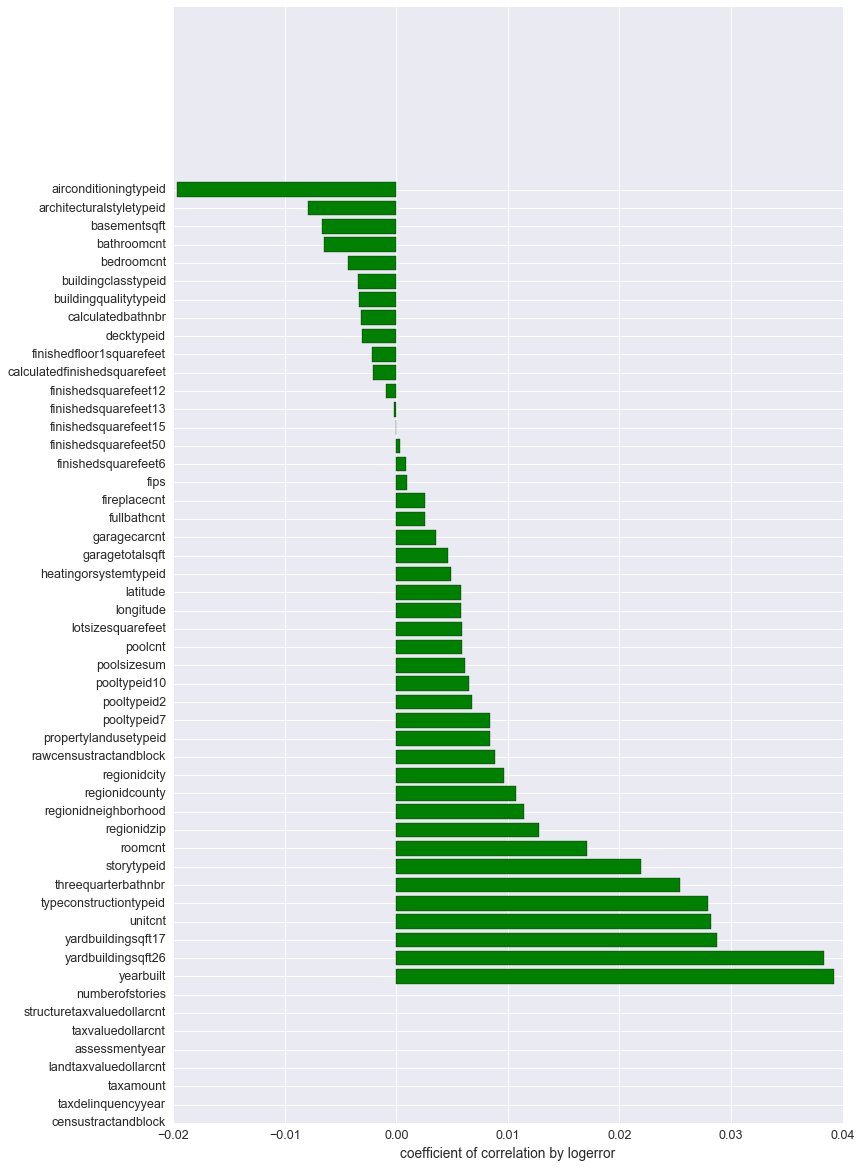

In [105]:
fig,ax=plt.subplots(figsize=(12,20))
y_pos=np.arange(len(labels))
x=np.array(corr_df.corr_values.values)
ax.barh(y_pos, x, align='center',color='green', ecolor='black')

ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('coefficient of correlation by logerror')

plt.show()


1. From the figure above, it's evident that overall features do not have strong relationships with logerror.
2. It seems like that airconditioningtypeid, regionidcounty, regionidneighborhood, regionzip, roomcnt,storytypeid, threequaterbathnbr, typeconstructiontypeid, unitcnt, yearbuildingsqft17, yearbuildingsgft26, yearbuilt have relatively higher relationships with logerror.
3. 

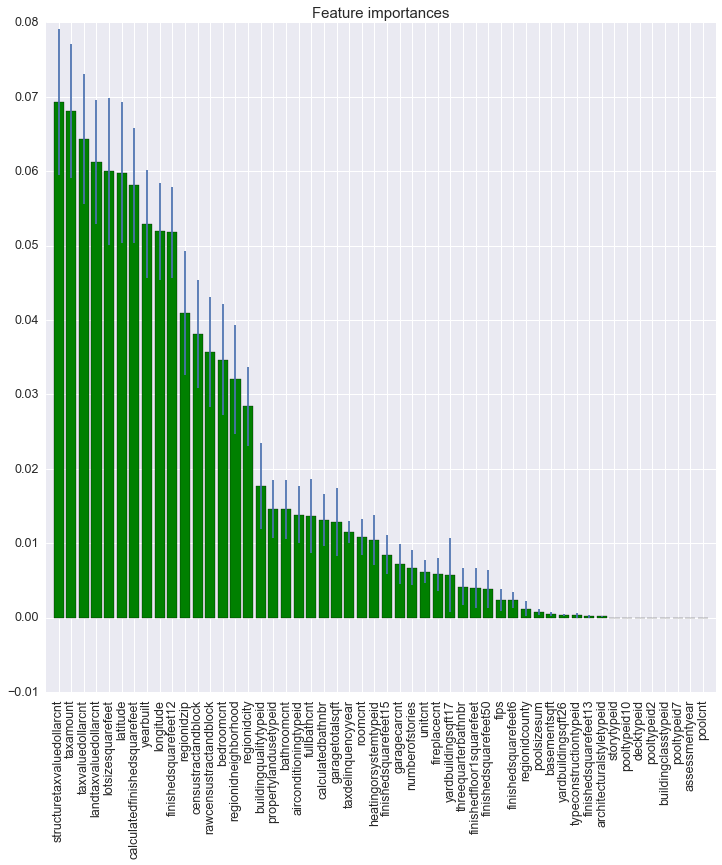

In [107]:
#feature importance
train_y = train['logerror'].values
train_df = train_new
feat_names = train_df.columns.values

from sklearn import ensemble
model = ensemble.ExtraTreesRegressor(n_estimators=25, max_depth=30, max_features=0.3, n_jobs=-1, random_state=0)
model.fit(train_df, train_y)

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:52]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="g", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

1. From the feature selection, we choose features with importance over 0.01, including: structuretaxvaluedollarcnt, taxamount, taxvaluedollarcnt, landtaxvaluedollarcnt, lotsizesquarefeet, lattitude, calculatedfinishedsquarefeet, yearbuilt, longitude, finishedsquarefeet12, regionzip, censustractandblock,rawcensustractandblock, bedroomcnt, regionneighboehood, regionidcity, buildingqualitytypeid, propertyandusetypeid, bathroomcnt, airconditioningtypeid, fullbathroomcnt,calculatedbathnbr,garagetotalsqft, taxdelinquencyyear, roomcnt, heatingsystemtypeid.

In [110]:
import statsmodels.api as sm
Y=t¸rain['logerror']
X=train_new[['structuretaxvaluedollarcnt','taxamount','taxvaluedollarcnt','landtaxvaluedollarcnt','lotsizesquarefeet','latitude','calculatedfinishedsquarefeet','yearbuilt','longitude','finishedsquarefeet12','regionidzip','censustractandblock','rawcensustractandblock','bedroomcnt','regionidneighborhood','regionidcity','buildingqualitytypeid','propertylandusetypeid','bathroomcnt','airconditioningtypeid','fullbathcnt','calculatedbathnbr','garagetotalsqft','taxdelinquencyyear','roomcnt','heatingorsystemtypeid']]
X=sm.add_constant(X)
model=sm.OLS(Y,X.astype(float))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     19.55
Date:                Thu, 19 Oct 2017   Prob (F-statistic):           1.60e-80
Time:                        22:48:37   Log-Likelihood:                 36960.
No. Observations:               90275   AIC:                        -7.387e+04
Df Residuals:                   90251   BIC:                        -7.365e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
const                        -6.361e-06    2.3e-05     -0.277      0.782     -5.14e-05  3.87e-05
structuretaxvaluedollarcnt   -3.416e-07    5.3e-08     -6.445      0.000     -4.45e-07 -2.38e-07
taxamount                    -3.284e-06   2.55e-07    -12.891      0.000     -3.78e-06 -2.78e-06
taxvaluedollarcnt              3.81e-07   5.26e-08      7.238      0.000      2.78e-07  4.84e-07
landtaxvaluedollarcnt        -3.544e-07   5.27e-08     -6.718      0.000     -4.58e-07 -2.51e-07
lotsizesquarefeet             5.924e-09   4.81e-09      1.233      0.218      -3.5e-09  1.53e-08
latitude                     -1.511e-10   2.87e-09     -0.053      0.958     -5.78e-09  5.48e-09
calculatedfinishedsquarefeet  3.757e-06   2.43e-06      1.549      0.121     -9.98e-07  8.51e-06
yearbuilt                      3.66e-06   3.17e-05      0.116      0.908     -5.84e-05  6.58e-05
longitude                    -1.146e-10   2.22e-09     -0.052      0.959     -4.46e-09  4.23e-09
finishedsquarefeet12          7.439e-06   2.32e-06      3.206      0.001      2.89e-06   1.2e-05
regionidzip                  -3.613e-07   1.47e-07     -2.462      0.014     -6.49e-07 -7.37e-08
censustractandblock           2.216e-14   2.53e-14      0.877      0.381     -2.74e-14  7.17e-14
rawcensustractandblock       -2.275e-08   2.53e-08     -0.897      0.369     -7.24e-08  2.69e-08
bedroomcnt                       0.0009      0.001      1.233      0.218        -0.001     0.002
regionidneighborhood         -2.157e-09   5.27e-09     -0.409      0.683     -1.25e-08  8.18e-09
regionidcity                 -3.228e-09   1.17e-08     -0.277      0.782     -2.61e-08  1.96e-08
buildingqualitytypeid            0.0004      0.000      1.028      0.304        -0.000     0.001
propertylandusetypeid            0.0003      0.000      2.116      0.034      1.96e-05     0.001
bathroomcnt                     -0.0094      0.003     -3.524      0.000        -0.015    -0.004
airconditioningtypeid            0.0002      0.000      0.462      0.644        -0.001     0.001
fullbathcnt                      0.0044      0.004      1.174      0.240        -0.003     0.012
calculatedbathnbr                0.0032      0.005      0.684      0.494        -0.006     0.012
garagetotalsqft              -8.748e-06   4.11e-06     -2.129      0.033     -1.68e-05 -6.95e-07
taxdelinquencyyear              -0.0009      0.001     -0.644      0.520        -0.004     0.002
roomcnt                        -9.7e-06      0.000     -0.036      0.972        -0.001     0.001
heatingorsystemtypeid           -0.0007      0.000     -3.596      0.000        -0.001    -0.000
==============================================================================
Omnibus:                    66823.864   Durbin-Watson:                   1.970
Prob(Omnibus): 

In [134]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X, Y) 
#clf.score(X,Y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

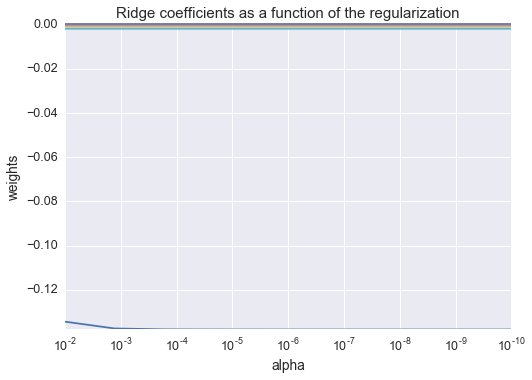

In [135]:
from sklearn import linear_model
n_alphas = 10
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, Y)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [114]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

[0.0,
 427.66726898469972,
 10.611024206846098,
 2959.8140323469906,
 1545.1605489558881,
 1.0619249499475774,
 2.0223932293030273,
 17.594618944256592,
 1.964779386833615,
 2.2342972919719379,
 14.775589329132753,
 1.0082007061648475,
 94.435045574460943,
 94.432181375433458,
 2.5483530414004112,
 1.0715514902152334,
 1.015209420901672,
 1.2798512915374496,
 1.4736411331799133,
 24.881258931192765,
 1.1838335584796782,
 44.246714709966732,
 72.549377746803827,
 1.3951665802412054,
 0.99497144417160877,
 2.0526218451789586,
 1.2577324824769924]